<a href="https://colab.research.google.com/github/HesamN7/DSP/blob/main/1Copy_of_Copy_of_chap01soln.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ThinkDSP

This notebook contains solutions to exercises in Chapter 1: Sounds and Signals

Copyright 2015 Allen Downey

License: [Creative Commons Attribution 4.0 International](http://creativecommons.org/licenses/by/4.0/)

In [ ]:
# Get thinkdsp.py

import os

if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

### Exercise 1

Go to http://freesound.org and download a sound sample that
includes music, speech, or other sounds that have a well-defined pitch.
Select a roughly half-second segment where the pitch is
constant.  Compute and plot the spectrum of the segment you selected.
What connection can you make between the timbre of the sound and the
harmonic structure you see in the spectrum?

Use `high_pass`, `low_pass`, and `band_stop` to
filter out some of the harmonics.  Then convert the spectrum back
to a wave and listen to it.  How does the sound relate to the
changes you made in the spectrum?

### Solution

I chose this recording (or synthesis?) of a trumpet section http://www.freesound.org/people/Dublie/sounds/170255/

As always, thanks to the people who contributed these recordings!

In [ ]:
Fif not os.path.exists('170255__dublie__trumpet.wav'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/170255__dublie__trumpet.wav

In [ ]:
from thinkdsp import read_wave

wave = read_wave(wave2.make_audio)
wave.normalize()
wave.make_audio()

AttributeError: ignored

Here's what the whole wave looks like:

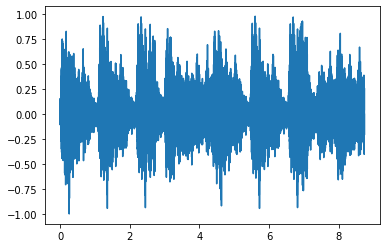

In [ ]:
wave.plot()

By trial and error, I selected a segment with a constant pitch (although I believe it is a chord played by at least two horns).

In [ ]:
segment = wave.segment(start=3.3, duration=0.4)
segment.make_audio()

Here's what the segment looks like:


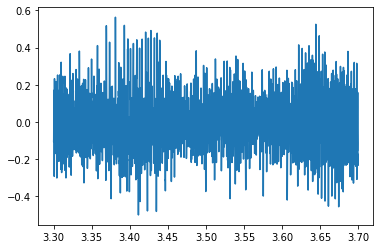

In [ ]:
segment.plot()

And here's an even shorter segment so you can see the waveform:

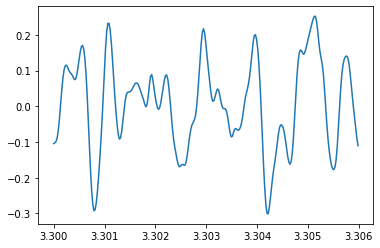

In [ ]:
segment.segment(start=3.3, duration=0.006).plot()

Here's what the spectrum looks like:

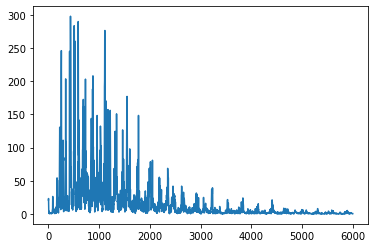

In [ ]:
spectrum = segment.make_spectrum()
spectrum.plot(high=6000)

It has lots of frequency components.  Let's zoom in on the fundamental and dominant frequencies:

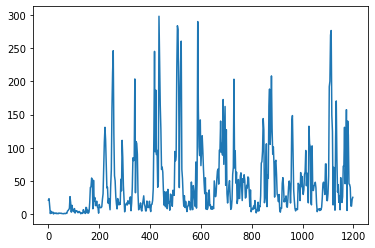

In [ ]:
spectrum = segment.make_spectrum()
spectrum.plot(high=1200)

`peaks` prints the highest points in the spectrum and their frequencies, in descending order:

In [ ]:
spectrum.peaks()[:30]

[(298.136754134616, 435.0),
 (290.13803810317023, 587.5),
 (283.8179390534606, 507.5),
 (278.34498119006645, 510.0),
 (276.6652308555045, 1112.5),
 (269.7577007955149, 1110.0),
 (260.6109745379782, 522.5),
 (246.27281882320707, 255.0),
 (245.22561164954203, 417.5),
 (233.7944716713392, 437.5),
 (227.84112522847198, 520.0),
 (217.12565692410354, 505.0),
 (213.67960360618835, 252.5),
 (208.2119750619318, 877.5),
 (203.64960377954932, 340.0),
 (203.2822218748776, 730.0),
 (200.18712315606484, 1107.5),
 (192.00504000423265, 1105.0),
 (191.37286716899675, 512.5),
 (188.42451321272068, 870.0),
 (186.80739172058097, 422.5),
 (177.22547458883645, 1550.0),
 (172.68424213580755, 687.5),
 (170.51705548670014, 1132.5),
 (169.59135107974424, 517.5),
 (163.97519133723804, 440.0),
 (162.45597032275595, 867.5),
 (162.1889194055322, 695.0),
 (159.66808599579394, 250.0),
 (157.41154523204602, 1172.5)]

The dominant peak is at 870 Hz.  It's not easy to dig out the fundamental, but with peaks at 507, 347, and 253 Hz, we can infer a fundamental at roughly 85 Hz, with harmonics at 170, 255, 340, 425, and 510 Hz.

85 Hz is close to F2 at 87 Hz.  The pitch we perceive is usually the fundamental, even when it is not dominant.  When you listen to this segment, what pitch(es) do you perceive?

Next we can filter out the high frequencies:

In [ ]:
spectrum.low_pass(2000)

And here's what it sounds like:

In [ ]:
spectrum.make_wave().make_audio()

The following interaction allows you to select a segment and apply different filters.  If you set the cutoff to 3400 Hz, you can simulate what the sample would sound like over an old (not digital) phone line.

In [ ]:
from thinkdsp import decorate
from IPython.display import display

def filter_wave(wave, start, duration, cutoff):
    """Selects a segment from the wave and filters it.
    
    Plots the spectrum and displays an Audio widget.
    
    wave: Wave object
    start: time in s
    duration: time in s
    cutoff: frequency in Hz
    """
    segment = wave.segment(start, duration)
    spectrum = segment.make_spectrum()

    spectrum.plot(high=5000, color='0.7')
    spectrum.low_pass(cutoff)
    spectrum.plot(high=5000, color='#045a8d')
    decorate(xlabel='Frequency (Hz)')
    
    audio = spectrum.make_wave().make_audio()
    display(audio)

In [ ]:
from ipywidgets import interact, fixed

interact(filter_wave, wave=fixed(wave), 
         start=(0, 5, 0.1), duration=(0, 5, 0.1), cutoff=(0, 5000, 100));

interactive(children=(FloatSlider(value=2.0, description='start', max=5.0), FloatSlider(value=2.0, description…

### Exercise 2

Synthesize a compound signal by creating SinSignal and CosSignal
objects and adding them up.  Evaluate the signal to get a Wave,
and listen to it.  Compute its Spectrum and plot it.
What happens if you add frequency
components that are not multiples of the fundamental?

### Solution

Here are some arbitrary components I chose.  It makes an interesting waveform!

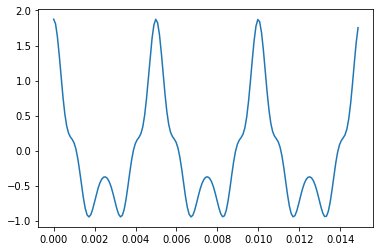

In [ ]:
from thinkdsp import CosSignal

signal = (CosSignal(freq=200, amp=1.0) +
          CosSignal(freq=400, amp=0.5) +
          CosSignal(freq=800, amp=0.25) +
          CosSignal(freq=1000, amp=0.125))
signal.plot()

We can use the signal to make a wave:

In [ ]:
wave2 = signal.make_wave(duration=1)
wave2.apodize()

And here's what it sounds like:

In [ ]:
wave2.make_audio()

The components are all multiples of 200 Hz, so they make a coherent sounding tone.

Here's what the spectrum looks like:

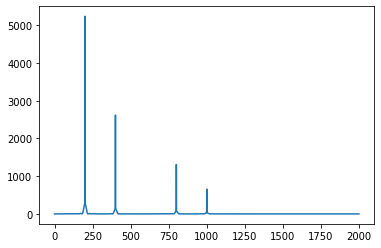

In [ ]:
spectrum = wave2.make_spectrum()
spectrum.plot(high=2000)

If we add a component that is not a multiple of 200 Hz, we hear it as a distinct pitch.

In [ ]:
signal += CosSignal(freq=450)
signal.make_wave().make_audio()

### Exercise 3

Write a function called `stretch` that takes a Wave and a stretch factor and speeds up or slows down the wave by modifying `ts` and `framerate`.  Hint: it should only take two lines of code.

### Solution

I'll use the trumpet example again:

In [ ]:
wave3 = read_wave('170255__dublie__trumpet.wav')
wave3.normalize()
wave3.make_audio()

Here's my implementation of `stretch`

In [ ]:
def stretch(wave, factor):
    wave.ts *= factor
    wave.framerate /= factor

And here's what it sounds like if we speed it up by a factor of 2.

In [ ]:
stretch(wave3, 0.5)
wave3.make_audio()

Here's what it looks like (to confirm that the `ts` got updated correctly).

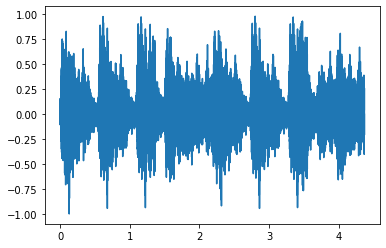

In [ ]:
wave3.plot()

I think it sounds better speeded up.  In fact, I wonder if we are playing the original at the right speed.